# Regressão Logística Simples e Múltipla

---

Desenvolveremos, neste notebook, algumas aplicações envolvendo a Regressão Logística (simples e múltipla). Como ferramentas de implementação, estaremos usando as bibliotecas `pandas`, `matplotlib` e a função `LogisticRegression` da biblioteca `sklearn`. Como bases de dados, utilizaremos a relação entre o tempo de um(uma) aluno(a) em uma autoescola e a ocorrência de um acidente (Regressão Logística Simples) e a relação entre dívida, histórico, garantias e renda com o risco de crédito (Regressão Logística Múltipla). Por fim, plotamos gráficos que representam os resultados obtidos após a realização das predições

## Aplicação de Regressão Logística Simples
---



Primeiro, vamos importar as bibliotecas `pandas`, para separar a base de dados, `matplotlib`, para a plotagem de gráficos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Adriel-Cabral/regressao-linear-log-stica/master/Acidente.csv')
df

,tempo-AE,acidente
0,15,1
1,16,1
2,18,1
3,20,1
4,22,1
5,24,1
6,26,1
7,28,0
8,30,0
9,32,0


Vamos separar os dados entre atributo previsor e rótulo

In [ ]:
previsor = df.iloc[:, 0:1].values
rotulo = df.iloc[:, 1].values

A partir da biblioteca `sklearn`, vamos importar o modelo logístico e predizer os nossos resultados

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
regressor_logistico = LogisticRegression()
regressor_logistico.fit(previsor, rotulo)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Fazendo uma previsão para alguém com 25 horas de autoescola

In [ ]:
resultado = regressor_logistico.predict([[25]])
resultado

array([1])

Vamos fazer a previsão para todos os atributos. Para cada atributo será gerado uma linha com 2 colunas, a `coluna[0]` indica a probabilidade de não sofrer um acidente e a `coluna[1]` de sofrer um acidente.

In [ ]:
resultados = regressor_logistico.predict_proba(previsor)
resultados

array([[0.0135491 , 0.9864509 ],
       [0.01830457, 0.98169543],
       [0.03322047, 0.96677953],
       [0.05955357, 0.94044643],
       [0.10450398, 0.89549602],
       [0.17699705, 0.82300295],
       [0.28383838, 0.71616162],
       [0.422096  , 0.577904  ],
       [0.57374588, 0.42625412],
       [0.71268836, 0.28731164],
       [0.82050941, 0.17949059],
       [0.89389209, 0.10610791],
       [0.93948578, 0.06051422],
       [0.96622841, 0.03377159],
       [0.98138699, 0.01861301]])

Para plotar o gráfico que foi gerado pelo modelo, vamos utilizar apenas a `coluna[1]`.

In [ ]:
resultados = resultados[:, 1]
resultados

array([0.9864509 , 0.98169543, 0.96677953, 0.94044643, 0.89549602,
       0.82300295, 0.71616162, 0.577904  , 0.42625412, 0.28731164,
       0.17949059, 0.10610791, 0.06051422, 0.03377159, 0.01861301])

Coeficientes do modelo

In [ ]:
print(regressor_logistico.coef_, regressor_logistico.intercept_)

[[-0.30566293]] [8.87273715]


Utilizaremos o gráfico de dirpersão em conjunto com o da linha, para verificarmos como ficou o modelo ajustado.

Text(0.5, 1.0, 'Regressão logística simples')

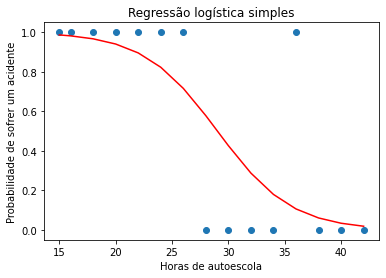

In [ ]:
plt.scatter(previsor, rotulo)
plt.plot(previsor, resultados, color='red')
plt.xlabel('Horas de autoescola')
plt.ylabel('Probabilidade de sofrer um acidente')
plt.title('Regressão logística simples')

## Aplicação de Regressão Logística Múltipla
---

Atribuindo o banco de dados à variável `dataset`

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/Adriel-Cabral/datasets/master/risco_credito2.csv')
dataset

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,acima_35,alto
3,desconhecida,baixa,nenhuma,acima_35,baixo
4,desconhecida,baixa,adequada,acima_35,baixo
5,ruim,baixa,nenhuma,0_15,alto
6,boa,baixa,nenhuma,acima_35,baixo
7,boa,alta,adequada,acima_35,baixo
8,boa,alta,nenhuma,0_15,alto
9,boa,alta,nenhuma,acima_35,baixo


Em seguida, vamos dividir nossas variáveis em duas categorias: classe (risco) e previsores (historia, divida, garantias e renda)

In [ ]:
previsores = dataset.drop('risco', axis = 1)
classe = dataset['risco']

In [ ]:
previsores

,historia,divida,garantias,renda
0,ruim,alta,nenhuma,0_15
1,desconhecida,alta,nenhuma,15_35
2,desconhecida,baixa,nenhuma,acima_35
3,desconhecida,baixa,nenhuma,acima_35
4,desconhecida,baixa,adequada,acima_35
5,ruim,baixa,nenhuma,0_15
6,boa,baixa,nenhuma,acima_35
7,boa,alta,adequada,acima_35
8,boa,alta,nenhuma,0_15
9,boa,alta,nenhuma,acima_35


In [ ]:
classe

0      alto
1      alto
2      alto
3     baixo
4     baixo
5      alto
6     baixo
7     baixo
8      alto
9     baixo
10     alto
Name: risco, dtype: object

Importando a função `LabelEncoder`, para transformar as variáveis categóricas em numéricas

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
labelencoder = LabelEncoder()

In [ ]:
previsores['divida'] = labelencoder.fit_transform(previsores['divida'])
previsores['renda'] = labelencoder.fit_transform(previsores['renda'])
previsores['garantias'] = labelencoder.fit_transform(previsores['garantias'])
previsores['historia'] = labelencoder.fit_transform(previsores['historia'])

In [ ]:
previsores

,historia,divida,garantias,renda
0,3,0,1,0
1,2,0,1,1
2,2,1,1,2
3,2,1,1,2
4,2,1,0,2
5,3,1,1,0
6,0,1,1,2
7,0,0,0,2
8,0,0,1,0
9,1,0,1,2


In [ ]:
classe

0      alto
1      alto
2      alto
3     baixo
4     baixo
5      alto
6     baixo
7     baixo
8      alto
9     baixo
10     alto
Name: risco, dtype: object

Criamos o regressor e ajustamos o modelo de acordo com os dados (previsor e rótulo)

In [ ]:
classificador = LogisticRegression()
classificador.fit(previsores, classe)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Coeficientes do modelo

In [ ]:
print(classificador.intercept_)

[-0.52358972]


In [ ]:
print(classificador.coef_)

[[-0.65034407  0.25428474 -0.45375558  1.17384764]]


Fazendo uma previsão do risco de credito de uma pessoa com historia ruim, divida alta, nenhuma garantia, e renda de 0 a 15mil.

In [ ]:
resultado = classificador.predict([[3,0,1,0]])

O risco, como apontado abaixo, é `alto`

In [ ]:
print(resultado)

['alto']


Agora, iremos prever para todos os demais da tabela. Para cada atributo será gerado uma linha com 2 colunas, a `coluna[0]` indica a probabilidade do risco ser alto e a coluna[1] do risco ser baixo.

In [ ]:
resultadoprob = classificador.predict_proba(previsores)
resultadoprob

array([[0.94923154, 0.05076846],
       [0.75104358, 0.24895642],
       [0.41971424, 0.58028576],
       [0.41971424, 0.58028576],
       [0.31481533, 0.68518467],
       [0.9354805 , 0.0645195 ],
       [0.16456668, 0.83543332],
       [0.13894197, 0.86105803],
       [0.72658115, 0.27341885],
       [0.32739168, 0.67260832],
       [0.85252324, 0.14747676]])

## Regressão Logística _from scratch_

---



Agora, faremos a implementação da Regressão Logística do zero. Para tal, precisaremos, primeiramente, definir a `função sigmoide (logística)`

$$\mathrm{Sigmoid(x)= \frac{1}{1+\exp^{-x}}}$$

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp**(-x))

Depois disso, será necessário definir nossa função de perda, levando aos ajustes dos coeficientes de nossas variáveis explicativas. Usaremos a função `Binary Cross-Entropy`, que penaliza mais veementemente predições distantes do valor real `y`

$$\mathrm{L(h)} = 
\left\{
\begin{array}{ll}
\begin{align}
-&\log(h), &&\text{se} \ y = 1 \\ 
-&\log(1-h), &&\text{se} \ y = 0
\end{align}
\end{array}
\right.$$

em que 
$$\mathrm{h = \text{Sigmoid}(z)}$$
e
$$\mathrm{z = b_1 * x_1+...+b_n*x_n}$$


E para implementar essa função, basta multiplicarmos por `y` e `1-y` para assim anularmos a condição inerente à função. Nesse caso, teremos:

$$\mathrm{L(h, y) = - y*\log(h) - (1-y)\log(1 - h)}$$

Já que iremos aplicar essa função em todos os pontos, faremos uma média aritmética para obter o erro médio. Desse modo, nossa implementação final ficará da seguinte forma:

In [ ]:
def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

Então, só nos resta fazer a descida no gradiente, a fim de encontrar os coeficientes que nos proporcionem o menor erro possível. O gradiente é obtido a partir da derivação da nossa função de perda, fazendo com que tenhamos ao fim:

$$\mathrm{Gradiente = \frac{X^T \cdot (h-y)}{n}}$$

Por fim, temos a construção da classe `LogisticRegression`

In [ ]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=100000):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
            
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):       
        # inicialização dos coeficientes
        self.coefficients = np.zeros(len(X))
        
        # descida do gradiente com ajuste dos coeficientes
        for i in range(self.epochs):
            z = np.dot(X, self.coefficients)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / len(X)
            self.coefficients -= self.learning_rate * gradient
    
    # retorna a probabilidade de X pertencer ou não ao rótulo
    def predict_prob(self, X):
        return self.__sigmoid(np.dot(X, self.coefficients))
    
    # realiza a predição considerando valores acima do threshold como 1, e abaixo como 0
    def predict(self, X, threshold=0.5):
        return self.predict_prob(X) >= threshold

## Referências

---
[Logistic Regression from Scratch](https://towardsdatascience.com/logistic-regression-from-scratch-69db4f587e17) \
[Logistic Regression from scratch in Python](https://medium.com/@martinpella/logistic-regression-from-scratch-in-python-124c5636b8ac)
